# ASSIGNMENT 4 - GROUP PROJECT - Decision Tree Learning

**Student 1:** s3623386 - Tran Thi Hong Phuong</br>
**Student 2:** s3595082 - Le Gia Bao

# Exploring dataset

In [9]:
import pandas as pd
pd.options.display.max_columns = None

df_phishing = pd.read_csv('phishing_final.csv')
print('Dataset size:', df_phishing.shape)
df_phishing.head()

Dataset size: (11055, 30)


,having_IP_Address,URL_Length,Shortining_Service,having_At_Symbol,double_slash_redirecting,Prefix_Suffix,having_Sub_Domain,Domain_registeration_length,Favicon,port,HTTPS_token,Request_URL,URL_of_Anchor,Links_in_tags,SFH,Submitting_to_email,Abnormal_URL,Redirect,on_mouseover,RightClick,popUpWidnow,Iframe,age_of_domain,DNSRecord,web_traffic,Page_Rank,Google_Index,Links_pointing_to_page,Statistical_report,Result
0,Yes,Medium,No,NaN,Yes,No,More than one,Short,Yes,Yes,Yes,Yes,Medium,Medium,Empty,Yes,Yes,No,No,Yes,No,Yes,Short,No,Medium,NaN,Yes,Two links and above,Reported,Phish
1,No,Medium,No,Yes,No,No,More than one,Short,Yes,Yes,No,Yes,Medium,Medium,Empty,No,No,No,Yes,Yes,Yes,Yes,Long,Yes,High,Low,Yes,No links,Not reported,Phish
2,Yes,Medium,No,Yes,Yes,No,More than one,Short,Yes,Yes,No,Yes,Medium,High,NaN,Yes,Yes,No,Yes,Yes,Yes,Yes,Long,No,NaN,High,Yes,Some links,Reported,Phish
3,Yes,NaN,Yes,NaN,Yes,No,One,Long,Yes,Yes,Yes,No,Medium,Medium,Empty,No,No,No,Yes,Yes,Yes,Yes,Short,Yes,High,High,Yes,No links,Not reported,Phish
4,Yes,Long,No,Yes,Yes,Yes,None,Short,Yes,Yes,No,Yes,Medium,NaN,Some,Yes,Yes,No,Yes,Yes,Yes,Yes,Long,No,High,Low,Yes,No links,Reported,Phish


## Feature Visualisation

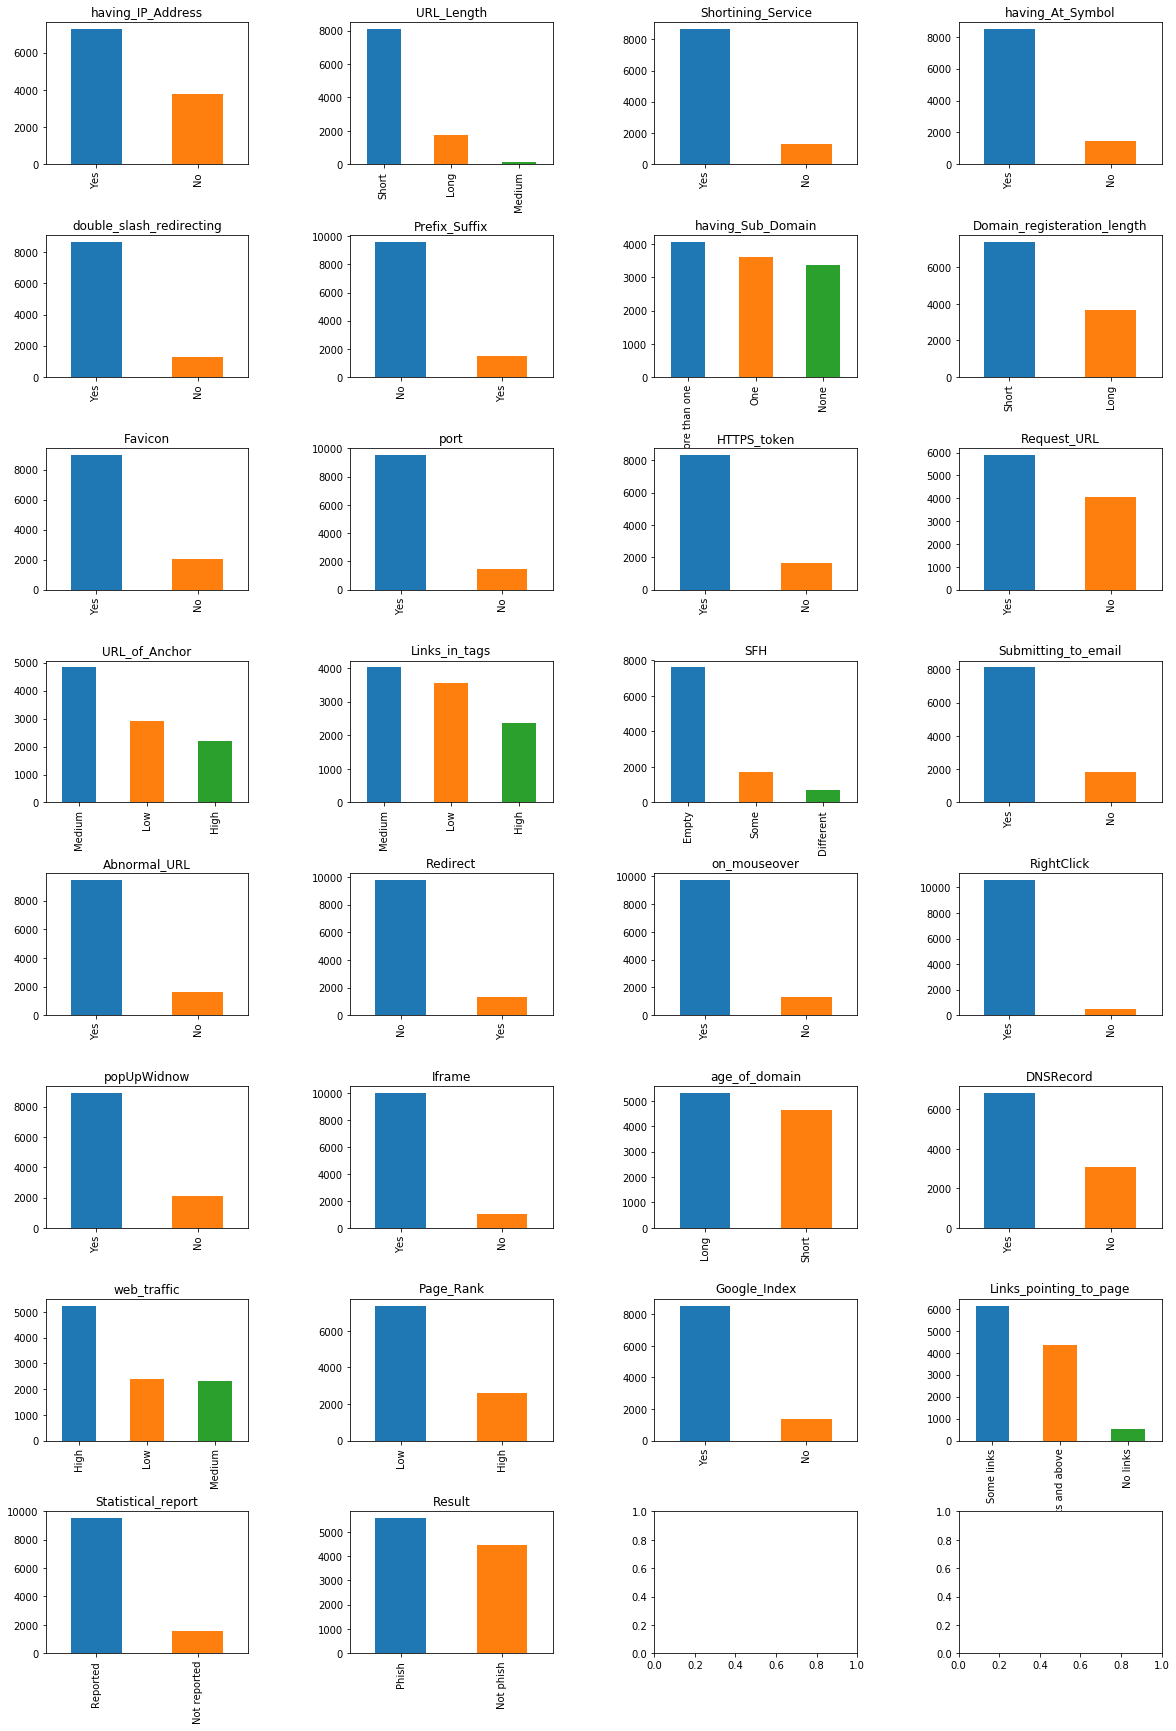

In [10]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(nrows=8, ncols=4, figsize=(20,30), sharex=False)
plt.subplots_adjust(wspace=0.5, hspace=0.5)
r = 0
c = 0

for col in list(df_phishing.columns):
    df_phishing[col].value_counts().plot(kind='bar', title=col, ax=ax[r][c])
    c += 1
    if c == 4:
        c = 0
        r += 1

plt.show()

## Total NaN

In [11]:
def check_nan():
    df_nan = pd.DataFrame(columns=['total'])
    df_nan['total'] = df_phishing.isna().sum()
    df_nan = df_nan[df_nan['total'] > 0]
    df_nan['percentage'] = df_nan['total'] / df_phishing.shape[0]
    df_nan.sort_values(by=['percentage'], inplace=True, ascending=False)
    return df_nan

check_nan()

,total,percentage
DNSRecord,1121,0.101402
Shortining_Service,1118,0.101131
web_traffic,1114,0.100769
URL_Length,1108,0.100226
Links_in_tags,1107,0.100136
Submitting_to_email,1105,0.099955
double_slash_redirecting,1103,0.099774
URL_of_Anchor,1099,0.099412
having_At_Symbol,1098,0.099322
Google_Index,1094,0.098960


## Label Encoding for Binary Features

In [12]:
binary_cols = ['having_IP_Address', 'Shortining_Service', 'having_At_Symbol', 'double_slash_redirecting', 'Prefix_Suffix', 'Domain_registeration_length', 'Favicon', 
               'port', 'HTTPS_token', 'Request_URL', 'Submitting_to_email', 'Abnormal_URL', 'Redirect', 'on_mouseover', 'RightClick', 'popUpWidnow',
               'Iframe', 'age_of_domain', 'DNSRecord', 'Page_Rank', 'Google_Index', 'Statistical_report', 'Result']

for col in binary_cols:
    df_phishing[col] = df_phishing[col].apply(lambda x: 1 if x in ['Yes', 'Long', 'High', 'Reported', 'Phish'] else 0)

df_phishing.head()

,having_IP_Address,URL_Length,Shortining_Service,having_At_Symbol,double_slash_redirecting,Prefix_Suffix,having_Sub_Domain,Domain_registeration_length,Favicon,port,HTTPS_token,Request_URL,URL_of_Anchor,Links_in_tags,SFH,Submitting_to_email,Abnormal_URL,Redirect,on_mouseover,RightClick,popUpWidnow,Iframe,age_of_domain,DNSRecord,web_traffic,Page_Rank,Google_Index,Links_pointing_to_page,Statistical_report,Result
0,1,Medium,0,0,1,0,More than one,0,1,1,1,1,Medium,Medium,Empty,1,1,0,0,1,0,1,0,0,Medium,0,1,Two links and above,1,1
1,0,Medium,0,1,0,0,More than one,0,1,1,0,1,Medium,Medium,Empty,0,0,0,1,1,1,1,1,1,High,0,1,No links,0,1
2,1,Medium,0,1,1,0,More than one,0,1,1,0,1,Medium,High,NaN,1,1,0,1,1,1,1,1,0,NaN,1,1,Some links,1,1
3,1,NaN,1,0,1,0,One,1,1,1,1,0,Medium,Medium,Empty,0,0,0,1,1,1,1,0,1,High,1,1,No links,0,1
4,1,Long,0,1,1,1,None,0,1,1,0,1,Medium,NaN,Some,1,1,0,1,1,1,1,1,0,High,0,1,No links,1,1


In [13]:
check_nan()

,total,percentage
web_traffic,1114,0.100769
URL_Length,1108,0.100226
Links_in_tags,1107,0.100136
URL_of_Anchor,1099,0.099412
SFH,1078,0.097512


## Label Encoding for Ternary Features

In [14]:
ternary_cols = ['web_traffic', 'URL_Length', 'Links_in_tags', 'URL_of_Anchor', 'SFH']

for col in ternary_cols:
    if col != 'SFH':
        df_phishing[col] = df_phishing[col].apply(lambda x: 1 if x in ['Short', 'Low'] else 2 if x == 'Medium' else 3 if x in ['Long', 'High'] else 0)

df_phishing.head()

,having_IP_Address,URL_Length,Shortining_Service,having_At_Symbol,double_slash_redirecting,Prefix_Suffix,having_Sub_Domain,Domain_registeration_length,Favicon,port,HTTPS_token,Request_URL,URL_of_Anchor,Links_in_tags,SFH,Submitting_to_email,Abnormal_URL,Redirect,on_mouseover,RightClick,popUpWidnow,Iframe,age_of_domain,DNSRecord,web_traffic,Page_Rank,Google_Index,Links_pointing_to_page,Statistical_report,Result
0,1,2,0,0,1,0,More than one,0,1,1,1,1,2,2,Empty,1,1,0,0,1,0,1,0,0,2,0,1,Two links and above,1,1
1,0,2,0,1,0,0,More than one,0,1,1,0,1,2,2,Empty,0,0,0,1,1,1,1,1,1,3,0,1,No links,0,1
2,1,2,0,1,1,0,More than one,0,1,1,0,1,2,3,NaN,1,1,0,1,1,1,1,1,0,0,1,1,Some links,1,1
3,1,0,1,0,1,0,One,1,1,1,1,0,2,2,Empty,0,0,0,1,1,1,1,0,1,3,1,1,No links,0,1
4,1,3,0,1,1,1,None,0,1,1,0,1,2,0,Some,1,1,0,1,1,1,1,1,0,3,0,1,No links,1,1


In [15]:
df_phishing['having_Sub_Domain'] = df_phishing['having_Sub_Domain'].apply(lambda x: 0 if x == 'None' else 1 if x == 'One' else 2)
df_phishing.head()

,having_IP_Address,URL_Length,Shortining_Service,having_At_Symbol,double_slash_redirecting,Prefix_Suffix,having_Sub_Domain,Domain_registeration_length,Favicon,port,HTTPS_token,Request_URL,URL_of_Anchor,Links_in_tags,SFH,Submitting_to_email,Abnormal_URL,Redirect,on_mouseover,RightClick,popUpWidnow,Iframe,age_of_domain,DNSRecord,web_traffic,Page_Rank,Google_Index,Links_pointing_to_page,Statistical_report,Result
0,1,2,0,0,1,0,2,0,1,1,1,1,2,2,Empty,1,1,0,0,1,0,1,0,0,2,0,1,Two links and above,1,1
1,0,2,0,1,0,0,2,0,1,1,0,1,2,2,Empty,0,0,0,1,1,1,1,1,1,3,0,1,No links,0,1
2,1,2,0,1,1,0,2,0,1,1,0,1,2,3,NaN,1,1,0,1,1,1,1,1,0,0,1,1,Some links,1,1
3,1,0,1,0,1,0,1,1,1,1,1,0,2,2,Empty,0,0,0,1,1,1,1,0,1,3,1,1,No links,0,1
4,1,3,0,1,1,1,0,0,1,1,0,1,2,0,Some,1,1,0,1,1,1,1,1,0,3,0,1,No links,1,1


In [16]:
df_phishing['Links_pointing_to_page'] = df_phishing['Links_pointing_to_page'].apply(lambda x: 0 if x == 'No links' else 2 if x == 'Some links' else 1)
df_phishing.head()

,having_IP_Address,URL_Length,Shortining_Service,having_At_Symbol,double_slash_redirecting,Prefix_Suffix,having_Sub_Domain,Domain_registeration_length,Favicon,port,HTTPS_token,Request_URL,URL_of_Anchor,Links_in_tags,SFH,Submitting_to_email,Abnormal_URL,Redirect,on_mouseover,RightClick,popUpWidnow,Iframe,age_of_domain,DNSRecord,web_traffic,Page_Rank,Google_Index,Links_pointing_to_page,Statistical_report,Result
0,1,2,0,0,1,0,2,0,1,1,1,1,2,2,Empty,1,1,0,0,1,0,1,0,0,2,0,1,1,1,1
1,0,2,0,1,0,0,2,0,1,1,0,1,2,2,Empty,0,0,0,1,1,1,1,1,1,3,0,1,0,0,1
2,1,2,0,1,1,0,2,0,1,1,0,1,2,3,NaN,1,1,0,1,1,1,1,1,0,0,1,1,2,1,1
3,1,0,1,0,1,0,1,1,1,1,1,0,2,2,Empty,0,0,0,1,1,1,1,0,1,3,1,1,0,0,1
4,1,3,0,1,1,1,0,0,1,1,0,1,2,0,Some,1,1,0,1,1,1,1,1,0,3,0,1,0,1,1


In [17]:
df_phishing = pd.get_dummies(df_phishing)
df_phishing.head()

,having_IP_Address,URL_Length,Shortining_Service,having_At_Symbol,double_slash_redirecting,Prefix_Suffix,having_Sub_Domain,Domain_registeration_length,Favicon,port,HTTPS_token,Request_URL,URL_of_Anchor,Links_in_tags,Submitting_to_email,Abnormal_URL,Redirect,on_mouseover,RightClick,popUpWidnow,Iframe,age_of_domain,DNSRecord,web_traffic,Page_Rank,Google_Index,Links_pointing_to_page,Statistical_report,Result,SFH_Different,SFH_Empty,SFH_Some
0,1,2,0,0,1,0,2,0,1,1,1,1,2,2,1,1,0,0,1,0,1,0,0,2,0,1,1,1,1,0,1,0
1,0,2,0,1,0,0,2,0,1,1,0,1,2,2,0,0,0,1,1,1,1,1,1,3,0,1,0,0,1,0,1,0
2,1,2,0,1,1,0,2,0,1,1,0,1,2,3,1,1,0,1,1,1,1,1,0,0,1,1,2,1,1,0,0,0
3,1,0,1,0,1,0,1,1,1,1,1,0,2,2,0,0,0,1,1,1,1,0,1,3,1,1,0,0,1,0,1,0
4,1,3,0,1,1,1,0,0,1,1,0,1,2,0,1,1,0,1,1,1,1,1,0,3,0,1,0,1,1,0,0,1


## Features Correlation

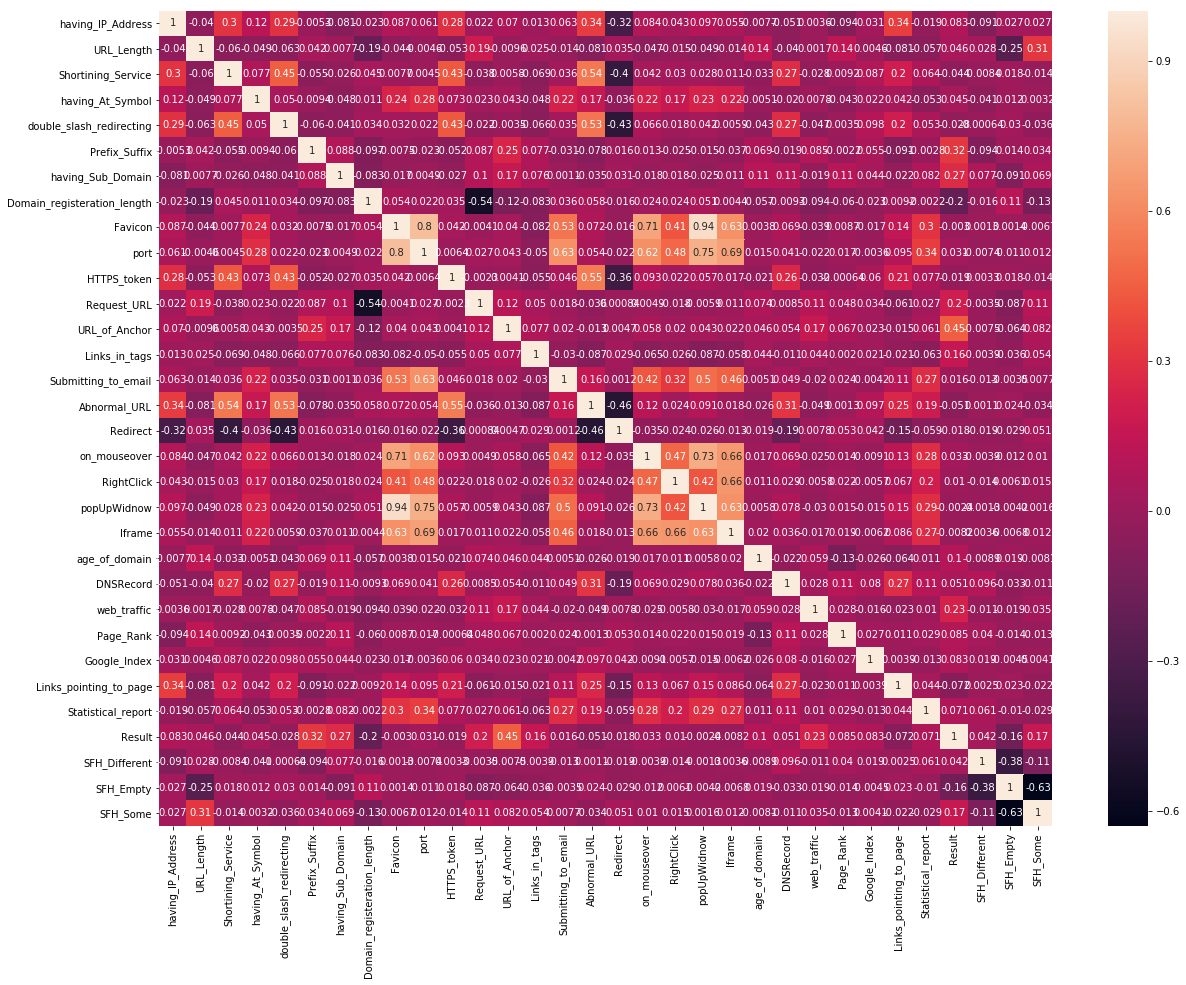

In [18]:
import seaborn as sns

plt.subplots(figsize = (20, 15))
sns.heatmap(df_phishing.corr(), annot = True)

# Baseline Model

In [105]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

X = df_phishing.drop(['Result'], axis=1)
Y = df_phishing['Result']

X_train, X_val, Y_train, Y_val = train_test_split(X, Y, test_size=0.2, random_state=1)

print(X_train.shape)
print(Y_train.shape)
print(X_val.shape)
print(Y_val.shape)

(8844, 31)
(8844,)
(2211, 31)
(2211,)


In [106]:
from sklearn.metrics import accuracy_score

def train(X, Y):
    X_train, X_val, Y_train, Y_val = train_test_split(X, Y, test_size=0.2, random_state=1)
    
    model = DecisionTreeClassifier(criterion='entropy', random_state=1)
    model.fit(X_train, Y_train)

    preds = model.predict(X_val)
    print('Val accuracy:', accuracy_score(preds, Y_val))
    
    feature_importance = pd.DataFrame(columns=['Feature', 'Importance'])
    feature_importance['Feature'] = X_train.columns
    feature_importance['Importance'] = model.feature_importances_
    feature_importance.sort_values(['Importance'], ascending=False, inplace=True)
    print(feature_importance)

train(X, Y)

Val accuracy: 0.793306196291271
                        Feature  Importance
12                URL_of_Anchor    0.354232
13                Links_in_tags    0.057579
6             having_Sub_Domain    0.057208
23                  web_traffic    0.049689
5                 Prefix_Suffix    0.041681
1                    URL_Length    0.032455
21                age_of_domain    0.031023
26       Links_pointing_to_page    0.030813
11                  Request_URL    0.025223
24                    Page_Rank    0.024497
22                    DNSRecord    0.023813
0             having_IP_Address    0.022529
4      double_slash_redirecting    0.021760
25                 Google_Index    0.021498
2            Shortining_Service    0.021064
7   Domain_registeration_length    0.020529
14          Submitting_to_email    0.019882
3              having_At_Symbol    0.019373
29                    SFH_Empty    0.018718
10                  HTTPS_token    0.016240
16                     Redirect    0.015309


# Duplicate Features

In [107]:
dup_cols_positive = ['on_mouseover', 'Favicon', 'port']
dup_cols_negative = ['Domain_registeration_length', 'Redirect', 'SFH_Some']

X = X.drop(dup_cols_negative + dup_cols_positive, axis = 1)

train(X, Y)

Val accuracy: 0.8046132971506106
                     Feature  Importance
9              URL_of_Anchor    0.359132
6          having_Sub_Domain    0.063099
10             Links_in_tags    0.057896
18               web_traffic    0.050833
5              Prefix_Suffix    0.042365
8                Request_URL    0.037832
1                 URL_Length    0.037056
21    Links_pointing_to_page    0.033970
19                 Page_Rank    0.028947
17                 DNSRecord    0.027044
16             age_of_domain    0.026257
3           having_At_Symbol    0.025051
0          having_IP_Address    0.024727
4   double_slash_redirecting    0.024364
20              Google_Index    0.022847
24                 SFH_Empty    0.022553
11       Submitting_to_email    0.021208
2         Shortining_Service    0.021176
7                HTTPS_token    0.018656
14               popUpWidnow    0.014159
22        Statistical_report    0.013586
15                    Iframe    0.009573
12              Abnormal

# Feature Construction

In [108]:
X['---sub_domain_vs_length'] = X['URL_Length'] * X['having_Sub_Domain']
train(X, Y)

Val accuracy: 0.7946630483943917
                     Feature  Importance
9              URL_of_Anchor    0.358842
10             Links_in_tags    0.057508
6          having_Sub_Domain    0.052392
18               web_traffic    0.052061
5              Prefix_Suffix    0.042519
8                Request_URL    0.036517
21    Links_pointing_to_page    0.031918
25   ---sub_domain_vs_length    0.028142
16             age_of_domain    0.027938
1                 URL_Length    0.027609
19                 Page_Rank    0.027334
17                 DNSRecord    0.026569
4   double_slash_redirecting    0.025332
3           having_At_Symbol    0.024466
11       Submitting_to_email    0.023444
20              Google_Index    0.022708
0          having_IP_Address    0.022492
24                 SFH_Empty    0.020448
2         Shortining_Service    0.019359
7                HTTPS_token    0.016751
14               popUpWidnow    0.015852
22        Statistical_report    0.012035
15                    If

In [109]:
X['---slash_at'] = X['double_slash_redirecting'] * X['having_At_Symbol']
train(X, Y)

Val accuracy: 0.8059701492537313
                     Feature  Importance
9              URL_of_Anchor    0.359089
10             Links_in_tags    0.056542
6          having_Sub_Domain    0.054439
18               web_traffic    0.051960
5              Prefix_Suffix    0.042214
8                Request_URL    0.036549
21    Links_pointing_to_page    0.032373
16             age_of_domain    0.028809
17                 DNSRecord    0.026848
19                 Page_Rank    0.026354
1                 URL_Length    0.024860
25   ---sub_domain_vs_length    0.023608
20              Google_Index    0.023398
24                 SFH_Empty    0.023381
0          having_IP_Address    0.021545
11       Submitting_to_email    0.020651
3           having_At_Symbol    0.019681
26               ---slash_at    0.019299
2         Shortining_Service    0.019017
7                HTTPS_token    0.016429
4   double_slash_redirecting    0.015905
14               popUpWidnow    0.014553
22        Statistical_re

In [110]:
X['---email_HTTPS'] = X['Submitting_to_email'] * X['HTTPS_token']
train(X, Y)

Val accuracy: 0.8073270013568521
                     Feature  Importance
9              URL_of_Anchor    0.358379
10             Links_in_tags    0.057717
6          having_Sub_Domain    0.050926
18               web_traffic    0.050219
5              Prefix_Suffix    0.042491
8                Request_URL    0.035151
21    Links_pointing_to_page    0.033737
16             age_of_domain    0.028539
1                 URL_Length    0.027916
17                 DNSRecord    0.027895
19                 Page_Rank    0.026788
0          having_IP_Address    0.023520
25   ---sub_domain_vs_length    0.022841
24                 SFH_Empty    0.021740
20              Google_Index    0.021102
2         Shortining_Service    0.019119
26               ---slash_at    0.017717
27            ---email_HTTPS    0.017394
3           having_At_Symbol    0.017152
4   double_slash_redirecting    0.015828
14               popUpWidnow    0.014678
11       Submitting_to_email    0.013874
7                HTTPS_t

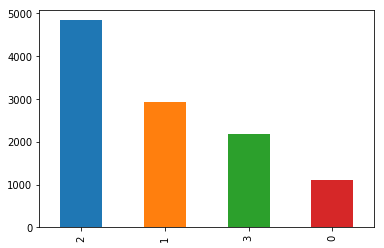

In [103]:
df_phishing['URL_of_Anchor'].value_counts().plot(kind='bar')

In [113]:
X.drop(['---traffic_rank'], 1, inplace=True)
train(X, Y)

Val accuracy: 0.8073270013568521
                     Feature  Importance
9              URL_of_Anchor    0.358379
10             Links_in_tags    0.057717
6          having_Sub_Domain    0.050926
18               web_traffic    0.050219
5              Prefix_Suffix    0.042491
8                Request_URL    0.035151
21    Links_pointing_to_page    0.033737
16             age_of_domain    0.028539
1                 URL_Length    0.027916
17                 DNSRecord    0.027895
19                 Page_Rank    0.026788
0          having_IP_Address    0.023520
25   ---sub_domain_vs_length    0.022841
24                 SFH_Empty    0.021740
20              Google_Index    0.021102
2         Shortining_Service    0.019119
26               ---slash_at    0.017717
27            ---email_HTTPS    0.017394
3           having_At_Symbol    0.017152
4   double_slash_redirecting    0.015828
14               popUpWidnow    0.014678
11       Submitting_to_email    0.013874
7                HTTPS_t

In [119]:
X.drop(['---shorten_length'], 1, inplace=True)
train(X, Y)

Val accuracy: 0.8073270013568521
                     Feature  Importance
9              URL_of_Anchor    0.358379
10             Links_in_tags    0.057717
6          having_Sub_Domain    0.050926
18               web_traffic    0.050219
5              Prefix_Suffix    0.042491
8                Request_URL    0.035151
21    Links_pointing_to_page    0.033737
16             age_of_domain    0.028539
1                 URL_Length    0.027916
17                 DNSRecord    0.027895
19                 Page_Rank    0.026788
0          having_IP_Address    0.023520
25   ---sub_domain_vs_length    0.022841
24                 SFH_Empty    0.021740
20              Google_Index    0.021102
2         Shortining_Service    0.019119
26               ---slash_at    0.017717
27            ---email_HTTPS    0.017394
3           having_At_Symbol    0.017152
4   double_slash_redirecting    0.015828
14               popUpWidnow    0.014678
11       Submitting_to_email    0.013874
7                HTTPS_t